In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import wave
import IPython.display as ipd
import python_speech_features as ps

In [107]:
def loadwav(path, mono=True):
    file = wave.open(path, 'r')
    params = file.getparams()
    nchannels, samplewidth, samplerate, wav_length = params[:4]
    datatype = {2:"int16", 4:"int32"}
    str_data = file.readframes(wav_length)
    data = np.frombuffer(str_data, dtype = np.short)
    if(nchannels == 2):
        left = data[::2]
        right= data[1::2]
        wavedata = np.stack([left, right], 1)
        if mono == True:
            wavedata = np.mean(wavedata, axis=1)
            wavedata = wavedata.astype(datatype[samplewidth])
    else:
        wavedata = data
    return wavedata, samplerate, samplewidth, nchannels

In [94]:
h5 = np.array([[1, 1, 0, 0, 0, 0, 0 ,0 ,0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [95]:
h5h5=h5*h5.T
print(h5h5)

[[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 

In [96]:
f = np.fft.fftshift(np.fft.ifft(h5)).real
print(f)

[[-0.04266834 -0.03627924 -0.02397489 -0.00666785  0.01435829  0.03754414
   0.06117009  0.08348392  0.10283071  0.1177756   0.1272102   0.13043478
   0.1272102   0.1177756   0.10283071  0.08348392  0.06117009  0.03754414
   0.01435829 -0.00666785 -0.02397489 -0.03627924 -0.04266834]]


In [99]:
Fs=44100
w, h = signal.freqz(f.T)
f = w / (2 * np.pi) * Fs;
a = 20 * np.log10(abs(h));
p = np.angle(h) * 180 / np.pi;

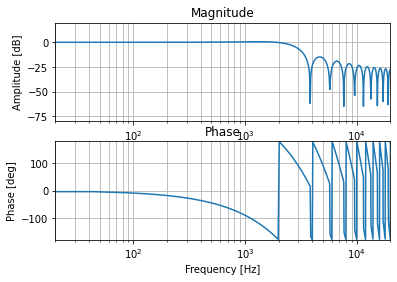

In [101]:
plt.subplot(211)

plt.plot(f, a);
plt.xscale('log')
plt.title('Magnitude')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.xlim(20, 20000)
plt.ylim(-80, 20)
plt.grid(which='both', axis='both')
#plt.axvline(fc, color='green') # cutoff frequency

plt.subplot(212)
plt.plot(f, p);
plt.xscale('log')
plt.title('Phase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [deg]')
plt.margins(0, 0.1)
plt.xlim(20, 20000)
plt.ylim(-180, 180)
plt.grid(which='both', axis='both')
#plt.axvline(fc, color='green') # cutoff frequency

plt.show()

### iirfilterを使ってフィルターを作る

In [145]:
sos = signal.iirfilter(2, 0.01, btype='lowpass', output="sos")
print(sos)

[[ 2.41359049e-04  4.82718098e-04  2.41359049e-04  1.00000000e+00
  -1.95557824e+00  9.56543677e-01]]


In [146]:
w, h = signal.sosfreqz(sos)

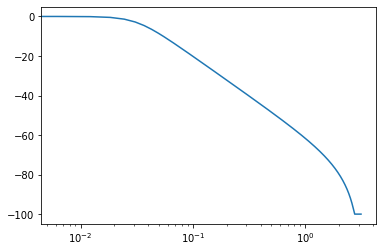

In [147]:
plt.semilogx(w, 20 * np.log10(np.maximum(abs(h), 1e-5)))

In [158]:
h6 = np.fft.fft(sos).real
h6h6 = h6.T*h6
print(h6.T*h6)
f = np.abs(np.fft.fftshift(np.fft.ifftn(h6h6)))
print(f)

[[ 3.72826820e-06  8.81294564e-04  2.89514350e-03 -7.55380820e-03
   2.89514350e-03  8.81294564e-04]
 [ 8.81294564e-04  2.08321952e-01  6.84359091e-01 -1.78558241e+00
   6.84359091e-01  2.08321952e-01]
 [ 2.89514350e-03  6.84359091e-01  2.24819017e+00 -5.86582231e+00
   2.24819017e+00  6.84359091e-01]
 [-7.55380820e-03 -1.78558241e+00 -5.86582231e+00  1.53046979e+01
  -5.86582231e+00 -1.78558241e+00]
 [ 2.89514350e-03  6.84359091e-01  2.24819017e+00 -5.86582231e+00
   2.24819017e+00  6.84359091e-01]
 [ 8.81294564e-04  2.08321952e-01  6.84359091e-01 -1.78558241e+00
   6.84359091e-01  2.08321952e-01]]
[[1.00000000e+00 9.77668441e-01 4.78513197e-01 2.41359049e-04
  4.78513197e-01 9.77668441e-01]
 [9.77668441e-01 9.55835580e-01 4.67827251e-01 2.35969125e-04
  4.67827251e-01 9.55835580e-01]
 [4.78513197e-01 4.67827251e-01 2.28974880e-01 1.15493490e-04
  2.28974880e-01 4.67827251e-01]
 [2.41359049e-04 2.35969125e-04 1.15493490e-04 5.82541905e-08
  1.15493490e-04 2.35969125e-04]
 [4.78513197e

In [169]:
x1 = np.linspace(-2, 3, 6)
x2 = np.linspace(-2, 3, 6)
print(x1)
X1, X2 = np.meshgrid(x1, x2)

[-2. -1.  0.  1.  2.  3.]


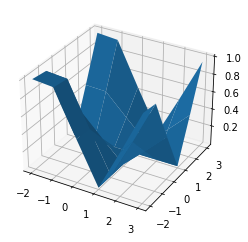

In [170]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, f)

In [121]:
b, a = signal.iirfilter(2, 0.01, btype='lowpass')
w, h = signal.freqz(b, a);

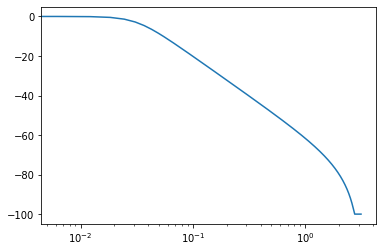

In [122]:
plt.semilogx(w, 20 * np.log10(np.maximum(abs(h), 1e-5)))

### matplotlibの3Dプロットを試す

In [138]:
N = 1000
x1 = np.linspace(-5, 5, N)
x2 = np.linspace(-5, 5, N)
print(x1.shape)

(1000,)


In [140]:
X1, X2 = np.meshgrid(x1, x2)
print(X2)

[[-5.         -5.         -5.         ... -5.         -5.
  -5.        ]
 [-4.98998999 -4.98998999 -4.98998999 ... -4.98998999 -4.98998999
  -4.98998999]
 [-4.97997998 -4.97997998 -4.97997998 ... -4.97997998 -4.97997998
  -4.97997998]
 ...
 [ 4.97997998  4.97997998  4.97997998 ...  4.97997998  4.97997998
   4.97997998]
 [ 4.98998999  4.98998999  4.98998999 ...  4.98998999  4.98998999
   4.98998999]
 [ 5.          5.          5.         ...  5.          5.
   5.        ]]


### 手動でローパスフィルターをかける

In [176]:
with open("extractMell_part.pkl", "rb") as f:
    features, label = pickle.load(f)

<AxesSubplot:>

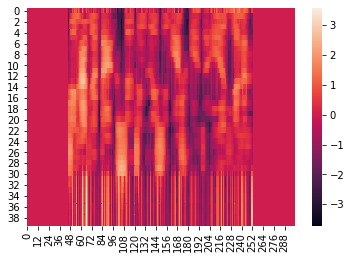

In [180]:
sns.heatmap(features[0][:,:,0].T)

(300, 40)


<AxesSubplot:>

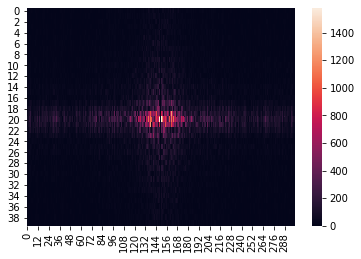

In [192]:
fts = features[0][:,:,0]
img_fft2 = np.fft.fftshift(np.fft.fft2(fts))
print(img_fft2.shape)
sns.heatmap(np.abs(img_fft2).T)

In [209]:
size = fts.shape
mask = np.zeros(size)
length_x = size[0]
length_y = size[1]
center_x = size[0]/2
center_y = size[1]/2
R = 20
for x in range(0,length_x):
    for y in range(0,length_y):
        if (x- center_x)**2 +(y- center_y)**2 <R**2:
            mask[x,y]=1

<AxesSubplot:>

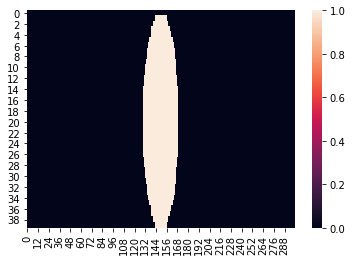

In [210]:
sns.heatmap(mask.T)

<AxesSubplot:>

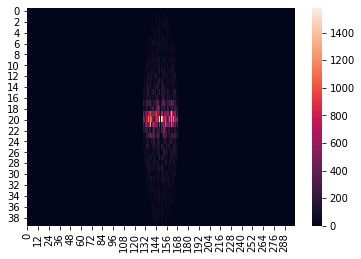

In [211]:
img_fft2_mask = img_fft2*mask
sns.heatmap(np.abs(img_fft2_mask).T)

<AxesSubplot:>

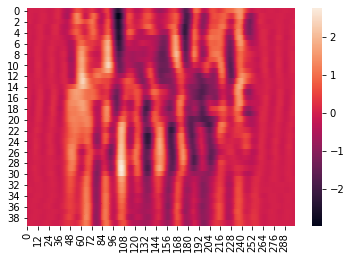

In [212]:
ifimage = np.fft.ifft2(np.fft.fftshift(img_fft2_mask))
sns.heatmap(ifimage.real.T)

<AxesSubplot:>

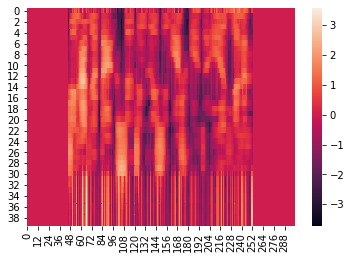

In [200]:
sns.heatmap(features[0][:,:,0].T)

In [213]:
#ローパスフィルターをかけてもスジは綺麗に取り除くことができない。

### スジの原因を探る

In [214]:
def loadwav(path, mono=True):
    file = wave.open(path, 'r')
    params = file.getparams()
    nchannels, samplewidth, samplerate, wav_length = params[:4]
    datatype = {2:"int16", 4:"int32"}
    str_data = file.readframes(wav_length)
    data = np.frombuffer(str_data, dtype = np.short)
    if(nchannels == 2):
        left = data[::2]
        right= data[1::2]
        wavedata = np.stack([left, right], 1)
        if mono == True:
            wavedata = np.mean(wavedata, axis=1)
            wavedata = wavedata.astype(datatype[samplewidth])
    else:
        wavedata = data
    return wavedata, samplerate, samplewidth, nchannels

In [222]:
def mellCepstrum(data, RATE, winlen=0.08, winstep=0.016, nfilt=40, start=None, end=None):
    data = np.append(data, np.zeros(1024 - data.shape[0] % 1024),0)
    eps = 1e-5
    if start == None and end == None:
        mel_spec = ps.logfbank(data, samplerate=RATE, winlen=winlen, winstep=winstep, nfilt=nfilt, nfft=int(winlen*RATE))
    elif start == None or end == None:
        point = start if end == None else end
        mel_spec = ps.logfbank(data[point], samplerate=RATE, winlen=winlen, winstep=winstep, nfilt=nfilt, nfft=int(winlen*RATE))
    else:
        mel_spec = ps.logfbank(data[start:end], samplerate=RATE, winlen=winlen, winstep=winstep, nfilt=nfilt, nfft=int(winlen*RATE))
    #deltaの特微量を生成
    delta1= ps.delta(mel_spec, 4)
    #delta-deltaの特微量を生成
    delta2 = ps.delta(delta1, 4)
    mean1 = np.mean(mel_spec)
    mean2 = np.mean(delta1)
    mean3 = np.mean(delta2)
    std1 = np.std(mel_spec)
    std2 = np.std(delta1)
    std3 = np.std(delta2)
    procd = np.empty((mel_spec.shape[0], nfilt, 3))
    procd[:,:,0] = (mel_spec - mean1)/(std1+eps) #mel_spec
    procd[:,:,1] = (delta1 - mean2)/(std2+eps) #delta1
    procd[:,:,2] = (delta2 - mean3)/(std3+eps) #delta2
    return procd

In [256]:
#X, samplerate, samplewidth, nchannels = loadwav("/Users/naokitakatani/Documents/datasets/SAVEE/JK_sa01.wav")
X, samplerate, samplewidth, nchannels = loadwav("/Users/naokitakatani/Documents/datasets/RAVDESS/Actor_07/03-01-04-01-02-02-07.wav")
ipd.display(ipd.Audio(X, rate=samplerate))

In [257]:
fts = mellCepstrum(X, samplerate)

<AxesSubplot:>

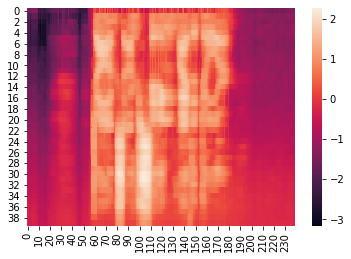

In [258]:
sns.heatmap(fts[:,:,0].T)

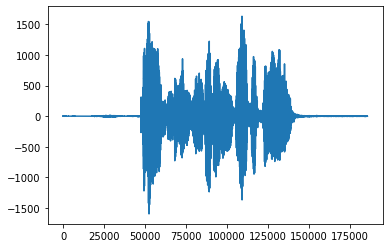

In [266]:
plt.plot(X)

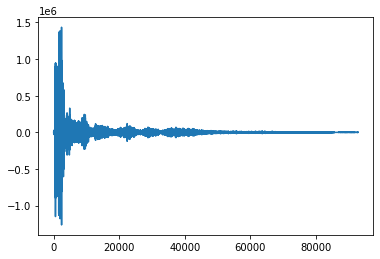

In [259]:
X_fft = np.fft.fft(X)
num = X_fft.shape[0]//2
plt.plot(X_fft[0:num].real)

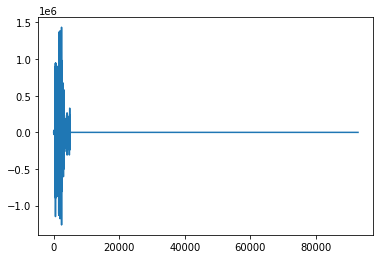

In [293]:
#高周波成分をカットしてスジが現れるか確認する。
remain = 5000
trim = X_fft.shape[0]-(2*remain)
l = np.hstack((X_fft[:remain], np.zeros(trim,float), X_fft[-remain:]))
plt.plot(l.real[0:num])

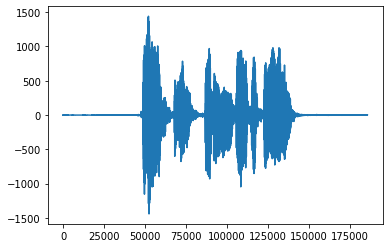

In [286]:
X_inv = np.fft.ifft(l)
plt.plot(X_inv.real)

In [287]:
ipd.display(ipd.Audio(X_inv.real, rate=samplerate))

<AxesSubplot:>

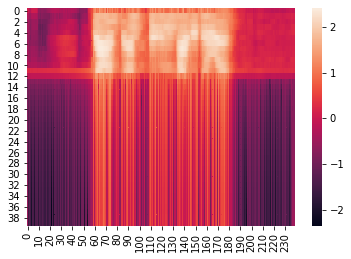

In [292]:
fts_inv = mellCepstrum(X_inv.real, samplerate)
sns.heatmap(fts_inv[:,:,0].T)

In [ ]:
#ビンゴ！高周波成分がなくなると、スジが出る！

### 低周波成分を小さくすると、イヤホンマイクからの入力に近づくか検討する。

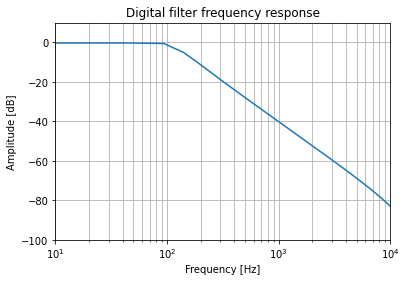

In [3]:
fs =48000
bpfc1 = 100
order = 2
b, a = signal.iirfilter(order, bpfc1,btype='lowpass',rs = 10,rp = 1.0, analog=False, ftype='cheby1',output='ba',fs=fs)

fs, h = signal.freqz(b,a,fs=fs)

fig, ax1 = plt.subplots()
plt.grid(which="both")
ax1.set_title('Digital filter frequency response')
ax1.semilogx(fs, 20 * np.log10(abs(h)))
ax1.axis((10, 10000, -100, 10))
ax1.set_ylabel('Amplitude [dB]')
ax1.set_xlabel('Frequency [Hz]')

plt.show()

[[ 0.87414556 -1.7381731   0.87414556  1.         -1.94879237  0.96308482]]


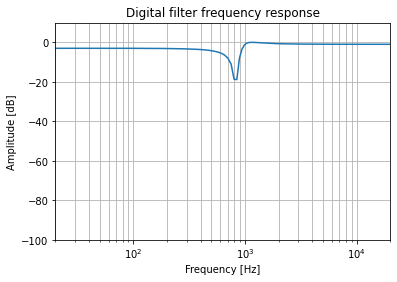

In [66]:
fs =48000
bpfc1 = 1000
order = 2
b, a = signal.iirfilter(order, bpfc1,btype='highpass',rs = 3,rp = 1.0, ftype='ellip',output='ba',fs=fs)
sos = signal.iirfilter(order, bpfc1,btype='highpass',rs = 3,rp = 1.0, ftype='ellip',output='sos',fs=fs)
print(sos)
fs, h = signal.freqz(b,a,fs=fs)

fig, ax1 = plt.subplots()
plt.grid(which="both")
ax1.set_title('Digital filter frequency response')
ax1.semilogx(fs, 20 * np.log10(abs(h)))
ax1.axis((20, 20000, -100, 10))
ax1.set_ylabel('Amplitude [dB]')
ax1.set_xlabel('Frequency [Hz]')

plt.show()

[ 1.         -1.98689718  0.98705159]
[ 0.88544639 -1.77089278  0.88544639]


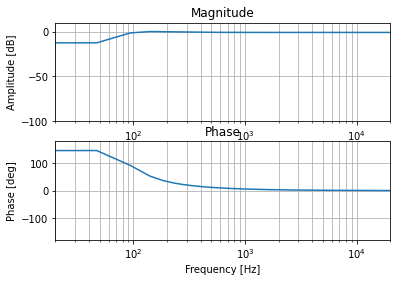

In [142]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
fs =48000
bpfc1 = 100
b, a = signal.iirfilter(order, bpfc1,btype='highpass',rs = 100,rp = 1.0, ftype='ellip',output='ba',fs=fs)
print(a) #出力 [ 1.         -1.94879237  0.96308482]
print(b) #出力 [ 0.87414556 -1.7381731   0.87414556]

w, h = signal.freqz(b,a,fs=fs)
a = 20 * np.log10(abs(h));
p = np.angle(h) * 180 / np.pi;

plt.subplot(211)
plt.grid(which="both")
plt.xscale('log')
plt.title('Magnitude')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.xlim(20, 20000)
plt.ylim(-80, 20)
#plt.semilogx(w, a)
plt.plot(w, a);
plt.axis((20, 20000, -100, 10))

plt.subplot(212)
plt.plot(w, p);
plt.xscale('log')
plt.title('Phase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [deg]')
plt.xlim(20, 20000)
plt.ylim(-180, 180)
plt.grid(which='both', axis='both')
plt.show()

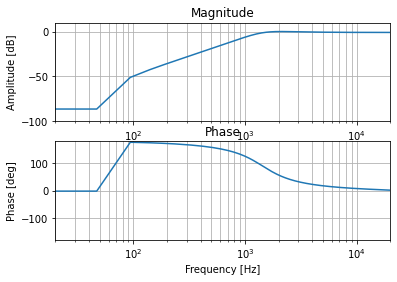

In [156]:
#X, samplerate, samplewidth, nchannels = loadwav("/Users/naokitakatani/Documents/datasets/SAVEE/JK_sa01.wav")
X, samplerate, samplewidth, nchannels = loadwav("/Users/naokitakatani/Documents/datasets/RAVDESS/Actor_07/03-01-04-01-02-02-07.wav")
ipd.display(ipd.Audio(X, rate=samplerate))
bpfc1 = 1500
b, a = signal.iirfilter(order, bpfc1,btype='highpass',rs = 60,rp = 1.0, ftype='ellip',output='ba',fs=samplerate)
Y = signal.lfilter(b, a, X)
ipd.display(ipd.Audio(Y, rate=samplerate))

w, h = signal.freqz(b,a,fs=fs)
a = 20 * np.log10(abs(h));
p = np.angle(h) * 180 / np.pi;

plt.subplot(211)
plt.grid(which="both")
plt.xscale('log')
plt.title('Magnitude')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.xlim(20, 20000)
plt.ylim(-80, 20)
#plt.semilogx(w, a)
plt.plot(w, a);
plt.axis((20, 20000, -100, 10))

plt.subplot(212)
plt.plot(w, p);
plt.xscale('log')
plt.title('Phase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [deg]')
plt.xlim(20, 20000)
plt.ylim(-180, 180)
plt.grid(which='both', axis='both')
plt.show()

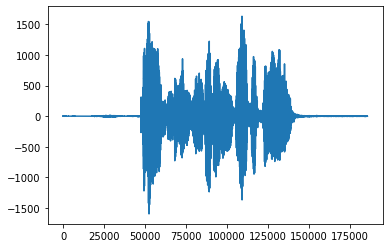

In [134]:
plt.plot(X)

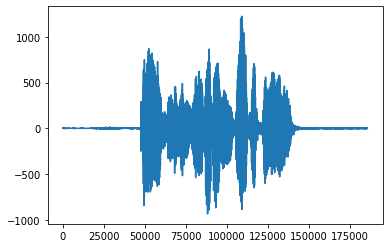

In [135]:
plt.plot(Y)